In [323]:
import os

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import scipy

hrv_middle_data_path = 'hrv-middle-data/'
measurement = 'CVSD_mean'
test_output_path = 'hrv-middle-data-test/'

res = pd.DataFrame([], columns=['pcode', 'RMSSD_mean', 'CVSD_mean', 'SDNN_mean', 'RMSSD_std', 'CVSD_std', 'SDNN_std'])

for p_index in range(80):
    participant_key = 'P' + str(p_index + 1).zfill(2)
    file_path = hrv_middle_data_path + participant_key + '_hrv_result.csv'

    if not os.path.isfile(file_path):
        print(file_path + ' do not exist!')
        continue

    df = pd.read_csv(file_path)
    
    if len(df) < 5:
        print(participant_key + ' data is empty')
        continue
    
    df[['HRV_RMSSD', 'HRV_CVSD', 'HRV_SDNN']].to_csv(test_output_path + participant_key + '_hrv_result.csv', index=False)
    res.loc[len(res)] = [participant_key, df['HRV_RMSSD'].mean(), df['HRV_CVSD'].mean(), df['HRV_SDNN'].mean(), df['HRV_RMSSD'].std(), df['HRV_CVSD'].std(), df['HRV_SDNN'].std()]

res


P01 data is empty
hrv-middle-data/P07_hrv_result.csv do not exist!
P08 data is empty
P10 data is empty
hrv-middle-data/P27_hrv_result.csv do not exist!
P29 data is empty
P42 data is empty
P48 data is empty
P49 data is empty
P56 data is empty
hrv-middle-data/P59_hrv_result.csv do not exist!
hrv-middle-data/P65_hrv_result.csv do not exist!
P70 data is empty
P73 data is empty
P74 data is empty
P75 data is empty
hrv-middle-data/P76_hrv_result.csv do not exist!


,pcode,RMSSD_mean,CVSD_mean,SDNN_mean,RMSSD_std,CVSD_std,SDNN_std
0,P02,141.296905,0.191112,191.936220,25.983921,0.046367,72.353254
1,P03,143.775314,0.182801,124.186532,35.660616,0.050072,28.961912
2,P04,170.287776,0.224555,159.135202,66.756277,0.102390,46.645934
3,P05,153.446800,0.207116,132.953570,55.451321,0.074358,45.954932
4,P06,148.134120,0.187312,128.870614,53.596497,0.068851,32.054078
...,...,...,...,...,...,...,...
58,P72,140.234990,0.161373,124.194380,43.736367,0.049082,34.202243
59,P77,158.220975,0.192820,134.670778,41.857098,0.053209,29.273654
60,P78,125.759511,0.172343,122.740389,62.713936,0.095483,53.072862
61,P79,164.850364,0.209505,162.408079,54.705866,0.078941,47.564866


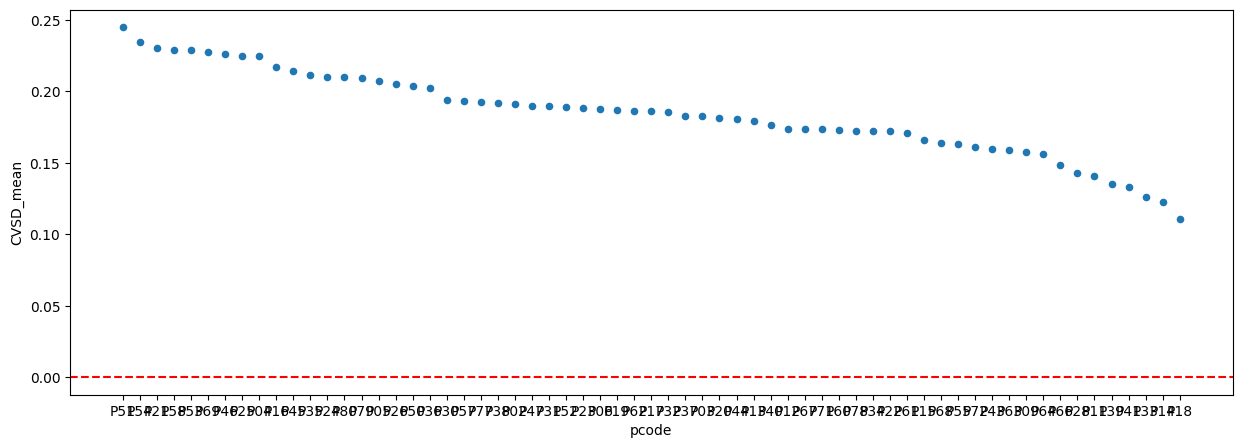

In [324]:

res.sort_values(by=measurement, ascending=False, inplace=True)
# res = res[4:64]
plot = res.plot(x='pcode', y=measurement, kind='scatter', figsize=(15, 5))


plot.axhline(0, color='red', linestyle='--', label='y=0 line')

In [325]:
df_subj = pd.read_csv('dataset/SubjData/UserInfo.csv')
df_subj

,pcode,participationStartDate,age,gender,openness,conscientiousness,neuroticism,extraversion,agreeableness,PSS,PHQ,GHQ
0,P01,2019-05-08,27,M,11,11,3,4,13,13,0,1
1,P02,2019-05-08,21,M,14,5,12,14,5,27,6,18
2,P03,2019-05-08,24,F,10,15,8,7,11,18,2,6
3,P04,2019-05-08,23,M,12,11,8,6,11,20,1,9
4,P05,2019-05-08,27,F,10,11,13,10,6,25,14,9
...,...,...,...,...,...,...,...,...,...,...,...,...
72,P76,2019-04-30,18,M,8,8,12,6,8,21,14,21
73,P77,2019-04-30,18,M,11,12,7,11,10,7,2,7
74,P78,2019-04-30,17,M,12,11,9,12,10,10,2,7
75,P79,2019-04-30,23,M,9,10,7,12,11,13,2,6


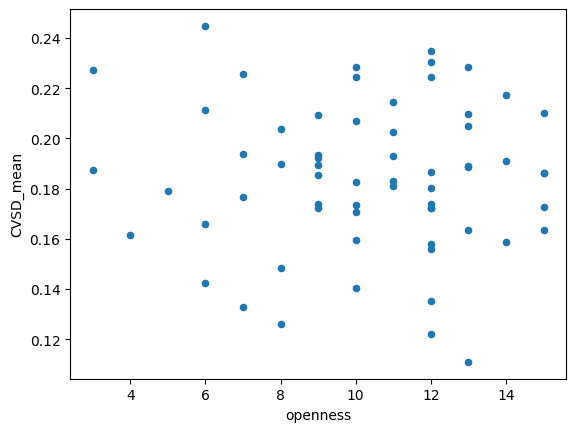

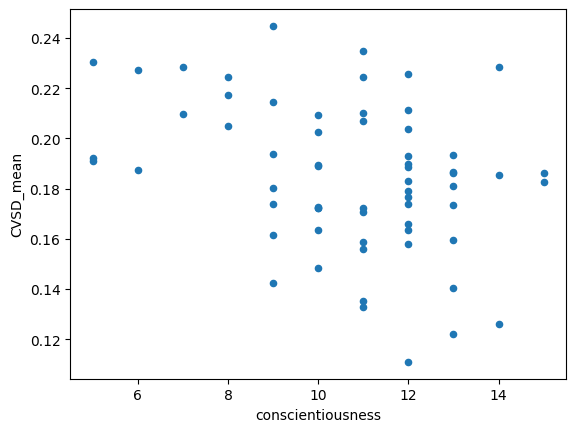

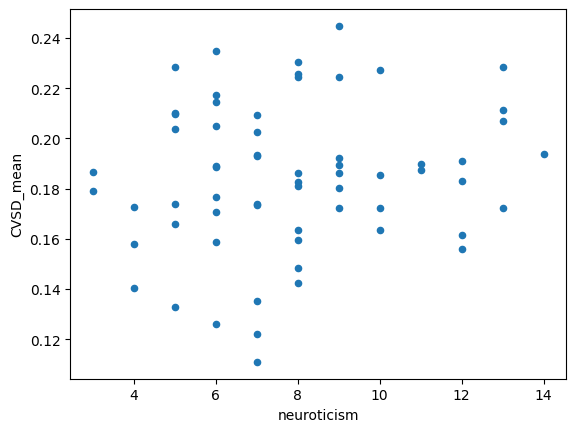

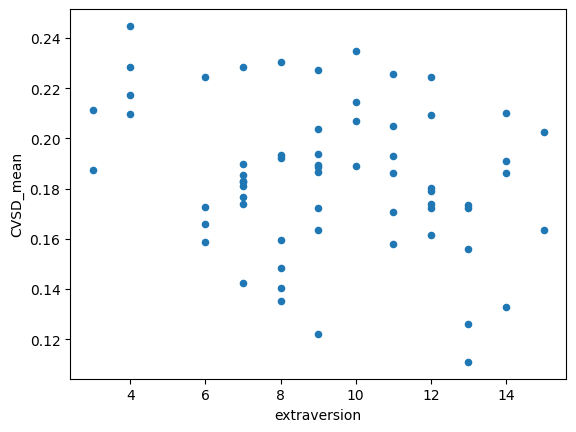

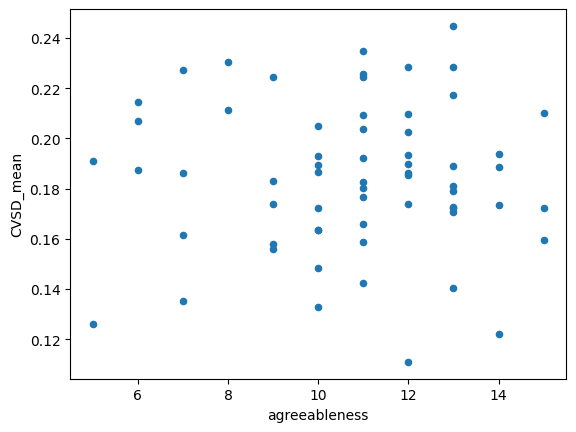

In [326]:
personality_traits = ['openness', 'conscientiousness', 'neuroticism', 'extraversion', 'agreeableness']
df_test = pd.merge(res, df_subj, on='pcode')

for trait in personality_traits:
    df_test.plot(x=trait, y=measurement, kind='scatter')


In [327]:
import statsmodels.api as sm

X = df_test[personality_traits]
y = df_test[measurement]

X = sm.add_constant(X)
model = sm.OLS(y, X)
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              CVSD_mean   R-squared:                       0.186
Model:                            OLS   Adj. R-squared:                  0.115
Method:                 Least Squares   F-statistic:                     2.611
Date:                Sun, 02 Jun 2024   Prob (F-statistic):             0.0340
Time:                        02:31:17   Log-Likelihood:                 139.46
No. Observations:                  63   AIC:                            -266.9
Df Residuals:                      57   BIC:                            -254.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.2207      0.03

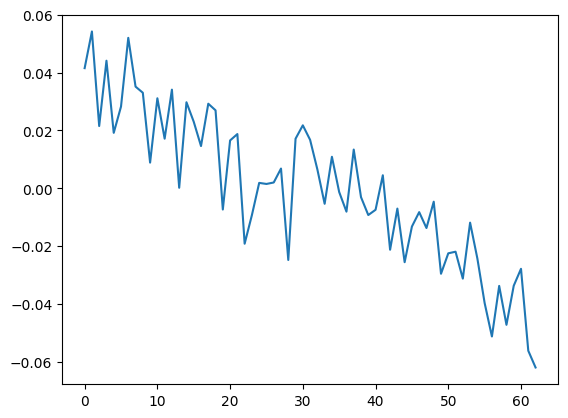

In [345]:
plot = plt.plot(results.resid)

In [346]:
scipy.stats.shapiro(results.resid)

ShapiroResult(statistic=0.9891199307461946, pvalue=0.8532983641814337)

In [329]:
for trait in personality_traits:
    print(trait, scipy.stats.pearsonr(df_test[trait], df_test[measurement]))

openness PearsonRResult(statistic=-0.027635775154047557, pvalue=0.8297667956861312)
conscientiousness PearsonRResult(statistic=-0.34595079465612505, pvalue=0.0054824647987346984)
neuroticism PearsonRResult(statistic=0.1499740341352661, pvalue=0.24071801253326558)
extraversion PearsonRResult(statistic=-0.25814155168812036, pvalue=0.04108537127865224)
agreeableness PearsonRResult(statistic=-0.003894613984106607, pvalue=0.9758328849392836)
